In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#dataset
dataframe=pd.read_excel('gdrive/My Drive/Sales+Assembly_Python_1.xlsx',usecols=[2])
dataframe.head()
#dataframe(columns=['Date'Product','Assembled'],inplace=True)
dataset = dataframe.values
dataset = dataset.astype('float32')

,Sales
0,8
1,6
2,3
3,5
4,8


In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.70)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

147 63


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
145/145 - 2s - loss: 0.0893 - 2s/epoch - 13ms/step
Epoch 2/100
145/145 - 0s - loss: 0.0302 - 200ms/epoch - 1ms/step
Epoch 3/100
145/145 - 0s - loss: 0.0266 - 211ms/epoch - 1ms/step
Epoch 4/100
145/145 - 0s - loss: 0.0266 - 203ms/epoch - 1ms/step
Epoch 5/100
145/145 - 0s - loss: 0.0266 - 190ms/epoch - 1ms/step
Epoch 6/100
145/145 - 0s - loss: 0.0266 - 194ms/epoch - 1ms/step
Epoch 7/100
145/145 - 0s - loss: 0.0265 - 193ms/epoch - 1ms/step
Epoch 8/100
145/145 - 0s - loss: 0.0268 - 199ms/epoch - 1ms/step
Epoch 9/100
145/145 - 0s - loss: 0.0267 - 212ms/epoch - 1ms/step
Epoch 10/100
145/145 - 0s - loss: 0.0266 - 217ms/epoch - 1ms/step
Epoch 11/100
145/145 - 0s - loss: 0.0266 - 230ms/epoch - 2ms/step
Epoch 12/100
145/145 - 0s - loss: 0.0265 - 229ms/epoch - 2ms/step
Epoch 13/100
145/145 - 0s - loss: 0.0266 - 227ms/epoch - 2ms/step
Epoch 14/100
145/145 - 0s - loss: 0.0265 - 211ms/epoch - 1ms/step
Epoch 15/100
145/145 - 0s - loss: 0.0266 - 195ms/epoch - 1ms/step
Epoch 16/100
145/145 

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.62 RMSE
Test Score: 1.12 RMSE


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import mean_absolute_error

In [ ]:
#Mean Absolute Error
mae_ =tf.keras.losses.MeanAbsoluteError()
mae_= np.round(mae_(testY,testPredict),2)
print('LSTM mae:', mae_)

LSTM mae: 1.27


In [ ]:
#Mean absolute percentage error
print('LSTM MAPE')
np.mean(np.abs((testY - testPredict)/testY))*100

LSTM MAPE


15.598710848048988

In [ ]:
#Showing the predicted values with actuals
df1=pd.DataFrame(trainY)
df1.head()
df2=pd.DataFrame(testPredict)
df2.head(8)
#df2=(testPredict)
#df = pd.DataFrame(list(zip(df1,df2)), columns =('Actual','Predicted'))
#df = pd.DataFrame(zip(df1,df2), columns =('Actual','Predicted'))
#df.head()
#df.tail()

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,6.0,3.0,5.0,8.0,8.0,7.0,9.0,10.0,7.0,8.0,...,8.0,7.0,7.0,8.0,7.0,9.0,10.0,11.0,13.0,10.0


,0
0,7.745881
1,8.200169
2,7.745881
3,7.295867
4,7.295867
5,7.295867
6,7.295867
7,7.295867


Text(0, 0.5, 'Price')

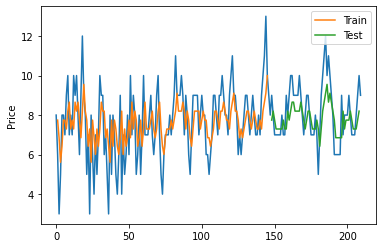

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
#plt.plot(trainPredictPlot)
#plt.plot(testPredictPlot)
#plt.legend(['Train', 'Test'], loc='upper right')
plt.plot(trainPredictPlot, label='Train')
plt.plot(testPredictPlot,label='Test')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()